In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 719 kB 5.1 MB/s 
     |████████████████████████████████| 4.4 MB 55.1 MB/s 
     |████████████████████████████████| 362 kB 60.5 MB/s 
     |████████████████████████████████| 1.2 MB 65.9 MB/s 
     |████████████████████████████████| 212 kB 72.6 MB/s 
     |████████████████████████████████| 1.1 MB 61.1 MB/s 
     |████████████████████████████████| 140 kB 72.3 MB/s 
     |████████████████████████████████| 101 kB 13.0 MB/s 
     |████████████████████████████████| 596 kB 71.6 MB/s 
     |████████████████████████████████| 127 kB 72.5 MB/s 
     |████████████████████████████████| 144 kB 75.9 MB/s 
     |████████████████████████████████| 271 kB 72.3 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████████████| 6.6 MB 59.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [ ]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [ ]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.155245,0.022127,0.008119,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.053987,0.042821,0.008119,00:59


In [ ]:
urls = search_images_ddg('grizzly bear', max_images=100)
len(urls),urls[0]

(100, 'https://bozone.com/site/wp-content/uploads/2019/03/GRIZZLY.jpeg')

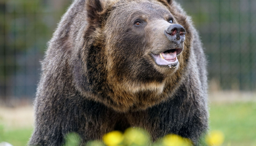

In [ ]:
download_url(urls[0], 'images/bear.jpg')
im = Image.open('images/bear.jpg')
im.thumbnail((256,256))
im

In [ ]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [3]:
sports_types = 'tennis','cricket','baseball'
path = Path('sports')

In [4]:
if not path.exists():
    path.mkdir()
    for o in sports_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'playing {o}',max_images=200)
        # print(results)
        download_images(dest, urls=results)

In [ ]:
# fns = get_image_files(path)
# fns.map(Path.unlink)

(#11) [None,None,None,None,None,None,None,None,None,None...]

In [5]:
fns = get_image_files(path)
failed = verify_images(fns)
failed

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(#22) [Path('sports/tennis/b70af9f1-6a56-4977-9119-9af3b647ea3d.jpg'),Path('sports/tennis/ad6a6f34-b4b5-4eb7-b230-f9d60e2fc480.jpg'),Path('sports/tennis/2b6c9473-61c0-470e-b9ef-08d861040331.jpg'),Path('sports/tennis/d68ba0cf-0a2d-4573-832a-0e10833a9213.jpg'),Path('sports/tennis/64ebaef9-ec55-4eb3-ac6a-e80decfdae26.jpg'),Path('sports/tennis/9da5c2e3-f0bf-48bd-ae90-cfc82ffe1a12.jpg'),Path('sports/tennis/da2b9f10-432e-4206-82e1-fa5b209abd04.jpg'),Path('sports/tennis/33ecd5e1-7156-45e9-ba2e-aa2e8ab0354e.jpg'),Path('sports/tennis/582f0141-c432-40d0-bf23-5436b4352d73.jpg'),Path('sports/tennis/15c10f9a-68f3-42b1-b9b3-299a677495a5.jpg')...]

In [6]:
failed.map(Path.unlink)

(#22) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)

)

In [7]:
sports = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)

)

In [8]:
dls = sports.dataloaders(path)

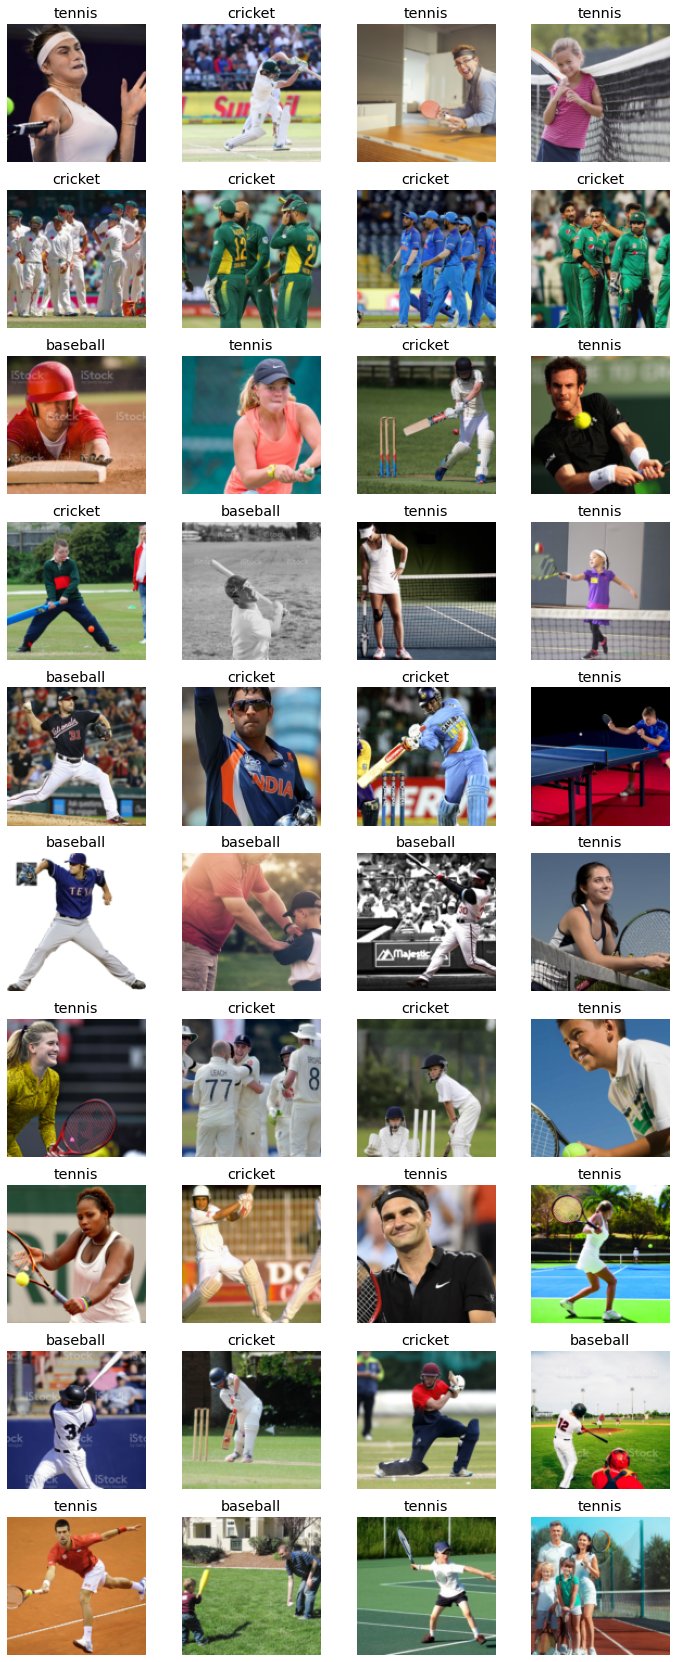

In [9]:
dls.train.show_batch(max_n=40, nrows=10)

In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.629944,2.791573,0.409524,00:26


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,1.013048,1.227980,0.333333,00:23
1,0.804276,1.005165,0.285714,00:24
2,0.662239,0.885082,0.266667,00:23
3,0.541378,0.835789,0.257143,00:24


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


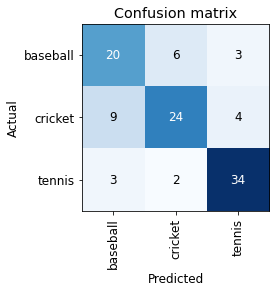

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

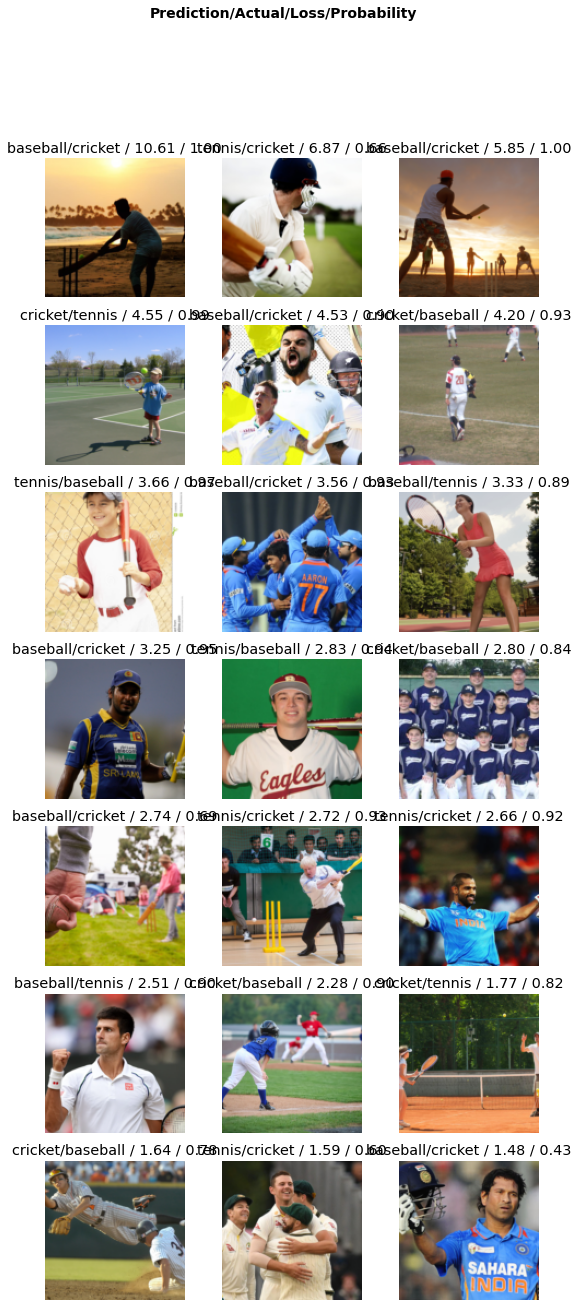

In [13]:
interp.plot_top_losses(21, nrows=7)

In [20]:
learn.export()

In [21]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [22]:
learn_inf = load_learner(path/'export.pkl')

In [12]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [14]:
img = PILImage.create(btn_upload.data[-1])

In [17]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [23]:
pred,pred_idx,probs = learn_inf.predict(img)

In [24]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cricket; Probability: 0.9957')

In [28]:
btn_run = widgets.Button(description='Classify')

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [29]:
btn_upload = widgets.FileUpload()
widgets.VBox([widgets.Label('Select your sport!'), btn_upload, btn_run, out_pl, lbl_pred])

In [25]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 344 kB 58.1 MB/s 
     |████████████████████████████████| 132 kB 68.3 MB/s 
     |████████████████████████████████| 70 kB 7.9 MB/s 
     |████████████████████████████████| 112 kB 70.7 MB/s 
     |████████████████████████████████| 561 kB 57.5 MB/s 
     |████████████████████████████████| 423 kB 70.1 MB/s 
     |████████████████████████████████| 80 kB 10.7 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 133 kB 64.3 MB/s 
  Created wheel for json5: filename=json5-0.9.8-py2.py3-none-any.whl size=18604 sha256=80d0ecfd97ebb6f4b184f233dbcb7fd2456a9e1ab8f3d97a85eb4e337d1a0fb8
  Stored in directory: /root/.cache/pip/wheels/ac/9b/de/6e4fd8f159d3dfa42c42ceddf2184fda29ea7fb1e8f5f8371c
Successfully

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila  OK
